In [99]:
! pip install meteostat


[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [100]:
! pip install geopy


[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [101]:
import pandas as pd
import seaborn as sns
import calendar
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Monthly,Daily
from geopy import geocoders

In [102]:
def get_monthly_weather(start,end,lan,lon):
    tpr = Point(lan,lon)
    data = Monthly(tpr,start,end)
    return data.fetch()

In [103]:
def get_daily_weather(start,end,lan,lon):
    tpr = Point(lan,lon)
    data = Daily(tpr,start,end)
    return data.fetch()

In [104]:
locator = geocoders.Nominatim(user_agent='myGeocoder')
place = 'Champ de Mars, Paris, France'
address = locator.geocode(place)
data = pd.DataFrame(get_monthly_weather(datetime(2022,1,1), datetime(2022,12,31),address.latitude, address.longitude))
data = data.reset_index()
data['time'] = pd.to_datetime(data['time'])
data['Month'] = data['time'].dt.strftime('%m')
year= data['time'].dt.strftime('%y')[0]

In [105]:
data

,time,tavg,tmin,tmax,prcp,wspd,pres,tsun,Month
0,2022-01-01,5.4,3.4,7.6,57.7,9.8,1027.9,NaN,01
1,2022-02-01,8.2,5.1,11.4,34.6,13.3,1021.4,NaN,02
2,2022-03-01,9.7,5.1,14.7,NaN,NaN,NaN,NaN,03
3,2022-04-01,12.2,7.8,16.7,62.3,12.5,1014.8,NaN,04
4,2022-05-01,17.4,12.6,22.4,NaN,10.1,1019.0,NaN,05
5,2022-06-01,20.2,15.3,25.3,96.2,9.7,1016.2,NaN,06
6,2022-07-01,22.8,17.2,28.5,12.4,9.8,1021.0,NaN,07
7,2022-08-01,23.0,17.7,28.6,69.0,9.8,1016.6,NaN,08
8,2022-09-01,16.9,13.5,21.2,65.4,8.9,1014.0,NaN,09
9,2022-10-01,15.7,12.7,19.7,55.4,9.2,1017.9,NaN,10


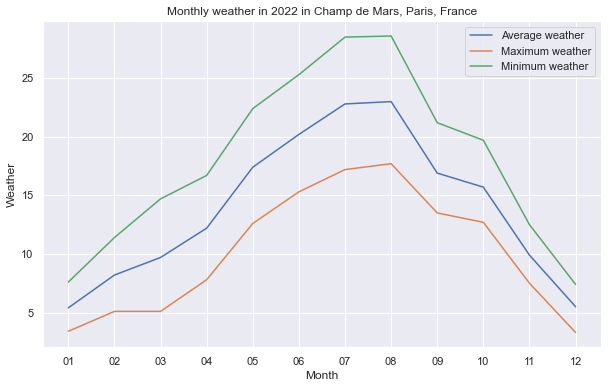

In [106]:
# Set up the plot
title = 'Monthly weather in 20' + str(year) + ' in ' + place
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))

# Plot each line
sns.lineplot(x='Month', y='tavg', data=data, label='Average weather')
sns.lineplot(x='Month', y='tmin', data=data, label='Maximum weather')
sns.lineplot(x='Month', y='tmax', data=data, label='Minimum weather')

# Set plot title and labels
plt.title(title)
plt.xlabel('Month')
plt.ylabel('Weather')

# Show the legend
plt.legend()

# Display the plot
plt.show()

In [107]:
data = pd.DataFrame(get_daily_weather(datetime(2022,1,1), datetime(2022,1,31),address.latitude, address.longitude))
data = data.reset_index()
data['time'] = pd.to_datetime(data['time'])
data['Day'] = data['time'].dt.strftime('%d')
year= data['time'].dt.strftime('%y')[0]
month= data['time'].dt.strftime('%m')[0]

In [108]:
month

'01'

In [109]:
data

,time,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,Day
0,2022-01-01,10.6,8.0,14.0,0.0,NaN,183.0,8.5,27.8,1024.6,NaN,01
1,2022-01-02,12.0,9.7,14.2,0.4,NaN,216.0,14.0,48.0,1018.9,NaN,02
2,2022-01-03,11.7,10.8,12.9,8.2,NaN,225.0,15.2,50.0,1015.4,NaN,03
3,2022-01-04,9.0,4.8,11.7,19.4,NaN,276.0,13.5,54.0,1002.0,NaN,04
4,2022-01-05,4.6,2.4,6.7,0.0,NaN,298.0,12.0,38.9,1014.3,NaN,05
5,2022-01-06,4.0,1.6,7.1,0.0,NaN,251.0,8.1,26.0,1021.5,NaN,06
6,2022-01-07,5.6,3.0,8.3,7.2,NaN,239.0,16.1,55.0,1016.2,NaN,07
7,2022-01-08,6.4,3.2,8.7,10.2,NaN,240.0,16.4,55.0,1009.2,NaN,08
8,2022-01-09,5.4,4.6,7.3,7.1,NaN,271.0,10.7,61.0,1006.2,NaN,09
9,2022-01-10,3.7,2.8,4.8,0.0,NaN,151.0,6.8,21.0,1020.5,NaN,10


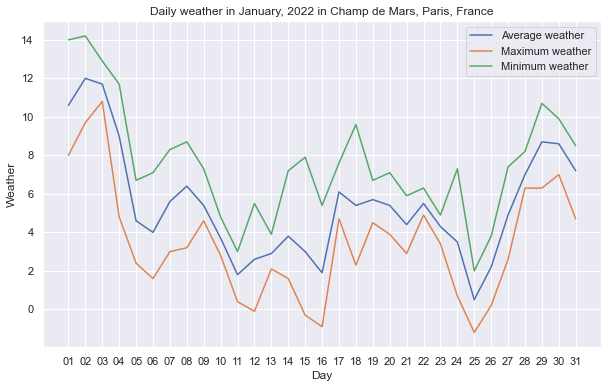

In [110]:
# Set up the plot
title = 'Daily weather in ' +   str(calendar.month_name[int(month)]) + ', 20' + str(year) + ' in ' + place
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))

# Plot each line
sns.lineplot(x='Day', y='tavg', data=data, label='Average weather')
sns.lineplot(x='Day', y='tmin', data=data, label='Maximum weather')
sns.lineplot(x='Day', y='tmax', data=data, label='Minimum weather')

# Set plot title and labels
plt.title(title)
plt.xlabel('Day')
plt.ylabel('Weather')

# Show the legend
plt.legend()

# Display the plot
plt.show()